# **Healthcare Resource Allocation Optimization**
This project uses machine learning regression methods to predict healthcare resource allocation optimization scores (TOPSIS) based on city-level socioeconomic, healthcare, environmental, and governance indicators.

# Library Imports and Data Loading

### Chinese Text Translate them into English

In [1]:
import pandas as pd
# Load  dataset
df = pd.read_excel("Healthcare Resource Allocation.xlsx", sheet_name="基础回归")
columns_to_check = ["city","regin","source","adm","oca","sou"]
for col in columns_to_check:
    print(f"\nUnique in {col}:")
    print(df[col].unique())


Unique in city:
['北京市' '天津市' '石家庄市' '唐山市' '秦皇岛市' '邯郸市' '邢台市' '保定市' '张家口市' '承德市' '沧州市'
 '廊坊市' '衡水市' '太原市' '大同市' '阳泉市' '长治市' '晋城市' '朔州市' '晋中市' '运城市' '忻州市' '临汾市'
 '吕梁市' '呼和浩特市' '包头市' '乌海市' '赤峰市' '通辽市' '鄂尔多斯市' '呼伦贝尔市' '巴彦淖尔市' '乌兰察布市'
 '沈阳市' '大连市' '鞍山市' '抚顺市' '本溪市' '丹东市' '锦州市' '营口市' '阜新市' '辽阳市' '盘锦市' '铁岭市'
 '朝阳市' '葫芦岛市' '长春市' '吉林市' '四平市' '辽源市' '通化市' '白山市' '松原市' '白城市' '哈尔滨市'
 '齐齐哈尔市' '鸡西市' '鹤岗市' '双鸭山市' '大庆市' '伊春市' '佳木斯市' '七台河市' '牡丹江市' '黑河市' '绥化市'
 '上海市' '南京市' '无锡市' '徐州市' '常州市' '苏州市' '南通市' '连云港市' '淮安市' '盐城市' '扬州市' '镇江市'
 '泰州市' '宿迁市' '杭州市' '宁波市' '温州市' '嘉兴市' '湖州市' '绍兴市' '金华市' '衢州市' '舟山市' '台州市'
 '丽水市' '合肥市' '芜湖市' '蚌埠市' '淮南市' '马鞍山市' '淮北市' '铜陵市' '安庆市' '黄山市' '滁州市' '阜阳市'
 '宿州市' '六安市' '亳州市' '池州市' '宣城市' '福州市' '厦门市' '莆田市' '三明市' '泉州市' '漳州市' '南平市'
 '龙岩市' '宁德市' '南昌市' '景德镇市' '萍乡市' '九江市' '新余市' '鹰潭市' '赣州市' '吉安市' '宜春市' '抚州市'
 '上饶市' '济南市' '青岛市' '淄博市' '枣庄市' '东营市' '烟台市' '潍坊市' '济宁市' '泰安市' '威海市' '日照市'
 '临沂市' '德州市' '聊城市' '滨州市' '菏泽市' '郑州市' '开封市' '洛阳市' '平顶山市' '安阳市' '鹤壁市' '新乡市'
 '焦作市' '濮阳市' '许昌市' '漯河市' '三门峡市' '南阳市' '

In [2]:
city_translation = {
    # Municipalities
    '北京市': 'Beijing', '天津市': 'Tianjin', '上海市': 'Shanghai', '重庆市': 'Chongqing',
    # Hebei Province
    '石家庄市': 'Shijiazhuang', '唐山市': 'Tangshan', '秦皇岛市': 'Qinhuangdao',
    '邯郸市': 'Handan', '邢台市': 'Xingtai', '保定市': 'Baoding',
    '张家口市': 'Zhangjiakou', '承德市': 'Chengde', '沧州市': 'Cangzhou',
    '廊坊市': 'Langfang', '衡水市': 'Hengshui',
    # Shanxi Province
    '太原市': 'Taiyuan', '大同市': 'Datong', '阳泉市': 'Yangquan',
    '长治市': 'Changzhi', '晋城市': 'Jincheng', '朔州市': 'Shuozhou',
    '晋中市': 'Jinzhong', '运城市': 'Yuncheng', '忻州市': 'Xinzhou',
    '临汾市': 'Linfen', '吕梁市': 'Lvliang',
    # Inner Mongolia
    '呼和浩特市': 'Hohhot', '包头市': 'Baotou', '乌海市': 'Wuhai',
    '赤峰市': 'Chifeng', '通辽市': 'Tongliao', '鄂尔多斯市': 'Ordos',
    '呼伦贝尔市': 'Hulunbuir', '巴彦淖尔市': 'Bayannur', '乌兰察布市': 'Ulanqab',
    # Liaoning Province
    '沈阳市': 'Shenyang', '大连市': 'Dalian', '鞍山市': 'Anshan',
    '抚顺市': 'Fushun', '本溪市': 'Benxi', '丹东市': 'Dandong',
    '锦州市': 'Jinzhou', '营口市': 'Yingkou', '阜新市': 'Fuxin',
    '辽阳市': 'Liaoyang', '盘锦市': 'Panjin', '铁岭市': 'Tieling',
    '朝阳市': 'Chaoyang', '葫芦岛市': 'Huludao',
    # Jilin Province
    '长春市': 'Changchun', '吉林市': 'Jilin', '四平市': 'Siping',
    '辽源市': 'Liaoyuan', '通化市': 'Tonghua', '白山市': 'Baishan',
    '松原市': 'Songyuan', '白城市': 'Baicheng',
    # Heilongjiang Province
    '哈尔滨市': 'Harbin', '齐齐哈尔市': 'Qiqihar', '鸡西市': 'Jixi',
    '鹤岗市': 'Hegang', '双鸭山市': 'Shuangyashan', '大庆市': 'Daqing',
    '伊春市': 'Yichun', '佳木斯市': 'Jiamusi', '七台河市': 'Qitaihe',
    '牡丹江市': 'Mudanjiang', '黑河市': 'Heihe', '绥化市': 'Suihua',
    # Jiangsu Province
    '南京市': 'Nanjing', '无锡市': 'Wuxi', '徐州市': 'Xuzhou',
    '常州市': 'Changzhou', '苏州市': 'Suzhou', '南通市': 'Nantong',
    '连云港市': 'Lianyungang', '淮安市': 'Huai\'an', '盐城市': 'Yancheng',
    '扬州市': 'Yangzhou', '镇江市': 'Zhenjiang', '泰州市': 'Taizhou',
    '宿迁市': 'Suqian',
    # Zhejiang Province
    '杭州市': 'Hangzhou', '宁波市': 'Ningbo', '温州市': 'Wenzhou',
    '嘉兴市': 'Jiaxing', '湖州市': 'Huzhou', '绍兴市': 'Shaoxing',
    '金华市': 'Jinhua', '衢州市': 'Quzhou', '舟山市': 'Zhoushan',
    '台州市': 'Taizhou_ZJ', '丽水市': 'Lishui',
    # Anhui Province
    '合肥市': 'Hefei', '芜湖市': 'Wuhu', '蚌埠市': 'Bengbu',
    '淮南市': 'Huainan', '马鞍山市': 'Ma\'anshan', '淮北市': 'Huaibei',
    '铜陵市': 'Tongling', '安庆市': 'Anqing', '黄山市': 'Huangshan',
    '滁州市': 'Chuzhou', '阜阳市': 'Fuyang', '宿州市': 'Suzhou_AH',
    '六安市': 'Lu\'an', '亳州市': 'Bozhou', '池州市': 'Chizhou',
    '宣城市': 'Xuancheng',
    # Fujian Province
    '福州市': 'Fuzhou', '厦门市': 'Xiamen', '莆田市': 'Putian',
    '三明市': 'Sanming', '泉州市': 'Quanzhou', '漳州市': 'Zhangzhou',
    '南平市': 'Nanping', '龙岩市': 'Longyan', '宁德市': 'Ningde',
    # Jiangxi Province
    '南昌市': 'Nanchang', '景德镇市': 'Jingdezhen', '萍乡市': 'Pingxiang',
    '九江市': 'Jiujiang', '新余市': 'Xinyu', '鹰潭市': 'Yingtan',
    '赣州市': 'Ganzhou', '吉安市': 'Ji\'an', '宜春市': 'Yichun_JX',
    '抚州市': 'Fuzhou_JX', '上饶市': 'Shangrao',
    # Shandong Province
    '济南市': 'Jinan', '青岛市': 'Qingdao', '淄博市': 'Zibo',
    '枣庄市': 'Zaozhuang', '东营市': 'Dongying', '烟台市': 'Yantai',
    '潍坊市': 'Weifang', '济宁市': 'Jining', '泰安市': 'Tai\'an',
    '威海市': 'Weihai', '日照市': 'Rizhao', '临沂市': 'Linyi',
    '德州市': 'Dezhou', '聊城市': 'Liaocheng', '滨州市': 'Binzhou',
    '菏泽市': 'Heze',
    # Henan Province
    '郑州市': 'Zhengzhou', '开封市': 'Kaifeng', '洛阳市': 'Luoyang',
    '平顶山市': 'Pingdingshan', '安阳市': 'Anyang', '鹤壁市': 'Hebi',
    '新乡市': 'Xinxiang', '焦作市': 'Jiaozuo', '濮阳市': 'Puyang',
    '许昌市': 'Xuchang', '漯河市': 'Luohe', '三门峡市': 'Sanmenxia',
    '南阳市': 'Nanyang', '商丘市': 'Shangqiu', '信阳市': 'Xinyang',
    '周口市': 'Zhoukou', '驻马店市': 'Zhumadian',
    # Hubei Province
    '武汉市': 'Wuhan', '黄石市': 'Huangshi', '十堰市': 'Shiyan',
    '宜昌市': 'Yichang', '襄阳市': 'Xiangyang', '鄂州市': 'Ezhou',
    '荆门市': 'Jingmen', '孝感市': 'Xiaogan', '荆州市': 'Jingzhou',
    '黄冈市': 'Huanggang', '咸宁市': 'Xianning', '随州市': 'Suizhou',
    # Hunan Province
    '长沙市': 'Changsha', '株洲市': 'Zhuzhou', '湘潭市': 'Xiangtan',
    '衡阳市': 'Hengyang', '邵阳市': 'Shaoyang', '岳阳市': 'Yueyang',
    '常德市': 'Changde', '张家界市': 'Zhangjiajie', '益阳市': 'Yiyang',
    '郴州市': 'Chenzhou', '永州市': 'Yongzhou', '怀化市': 'Huaihua',
    '娄底市': 'Loudi',
    # Guangdong Province
    '广州市': 'Guangzhou', '韶关市': 'Shaoguan', '深圳市': 'Shenzhen',
    '珠海市': 'Zhuhai', '汕头市': 'Shantou', '佛山市': 'Foshan',
    '江门市': 'Jiangmen', '湛江市': 'Zhanjiang', '茂名市': 'Maoming',
    '肇庆市': 'Zhaoqing', '惠州市': 'Huizhou', '梅州市': 'Meizhou',
    '汕尾市': 'Shanwei', '河源市': 'Heyuan', '阳江市': 'Yangjiang',
    '清远市': 'Qingyuan', '东莞市': 'Dongguan', '中山市': 'Zhongshan',
    '潮州市': 'Chaozhou', '揭阳市': 'Jieyang', '云浮市': 'Yunfu',
    # Guangxi Province
    '南宁市': 'Nanning', '柳州市': 'Liuzhou', '桂林市': 'Guilin',
    '梧州市': 'Wuzhou', '北海市': 'Beihai', '防城港市': 'Fangchenggang',
    '钦州市': 'Qinzhou', '贵港市': 'Guigang', '玉林市': 'Yulin',
    '百色市': 'Baise', '贺州市': 'Hezhou', '河池市': 'Hechi',
    '来宾市': 'Laibin', '崇左市': 'Chongzuo',
    # Hainan Province
    '海口市': 'Haikou', '三亚市': 'Sanya',
    # Sichuan Province
    '成都市': 'Chengdu', '自贡市': 'Zigong', '攀枝花市': 'Panzhihua',
    '泸州市': 'Luzhou', '德阳市': 'Deyang', '绵阳市': 'Mianyang',
    '广元市': 'Guangyuan', '遂宁市': 'Suining', '内江市': 'Neijiang',
    '乐山市': 'Leshan', '南充市': 'Nanchong', '眉山市': 'Meishan',
    '宜宾市': 'Yibin', '广安市': 'Guang\'an', '达州市': 'Dazhou',
    '雅安市': 'Ya\'an', '巴中市': 'Bazhong', '资阳市': 'Ziyang',
    # Guizhou Province
    '贵阳市': 'Guiyang', '六盘水市': 'Liupanshui', '遵义市': 'Zunyi',
    '安顺市': 'Anshun',
    # Yunnan Province
    '昆明市': 'Kunming', '曲靖市': 'Qujing', '玉溪市': 'Yuxi',
    '保山市': 'Baoshan', '昭通市': 'Zhaotong', '丽江市': 'Lijiang',
    '普洱市': 'Pu\'er', '临沧市': 'Lincang',
    # Shaanxi Province
    '西安市': 'Xi\'an', '铜川市': 'Tongchuan', '宝鸡市': 'Baoji',
    '咸阳市': 'Xianyang', '渭南市': 'Weinan', '延安市': 'Yan\'an',
    '汉中市': 'Hanzhong', '榆林市': 'Yulin_SN', '安康市': 'Ankang',
    '商洛市': 'Shangluo',
    # Gansu Province
    '兰州市': 'Lanzhou', '嘉峪关市': 'Jiayuguan', '金昌市': 'Jinchang',
    '白银市': 'Baiyin', '天水市': 'Tianshui', '武威市': 'Wuwei',
    '张掖市': 'Zhangye', '平凉市': 'Pingliang', '酒泉市': 'Jiuquan',
    '庆阳市': 'Qingyang', '定西市': 'Dingxi', '陇南市': 'Longnan',
    # Qinghai Province
    '西宁市': 'Xining',
    # Ningxia Province
    '银川市': 'Yinchuan', '石嘴山市': 'Shizuishan', '吴忠市': 'Wuzhong',
    '固原市': 'Guyuan', '中卫市': 'Zhongwei',
    # Xinjiang Province
    '乌鲁木齐市': 'Urumqi', '克拉玛依市': 'Karamay'
}
# Categorical variable translations
categorical_translations = {
    'regin': {
        '东部': 'Eastern',
        '中部': 'Central',
        '西部': 'Western'
    },
    'source': {
        '非资源型城市': 'Non-resource-based City',
        '资源型城市': 'Resource-based City'
    },
    'adm': {
        '省会城市': 'Provincial Capital',
        '非省会城市': 'Non-provincial Capital'
    },
    'oca': {
        '沿海城市': 'Coastal City',
        '非沿海城市': 'Non-coastal City'
    },
    'sou': {
        '北方城市': 'Northern City',
        '南方城市': 'Southern City'
    }
}
if 'city' in df.columns:
    df['city'] = df['city'].map(city_translation)
    print("✓ City names translated")
# Translate categorical variables
for col, mapping in categorical_translations.items():
    if col in df.columns:
        df[col] = df[col].map(mapping)
        print(f"✓ Column '{col}' translated")
print(f"Total cities mapped: {len(city_translation)}")
print(f"Categorical columns translated: {len(categorical_translations)}")
print(df[['city', 'regin', 'source', 'adm', 'oca', 'sou']].head(10))
for col in ['city', 'regin', 'source', 'adm', 'oca', 'sou']:
    if col in df.columns:
        null_count = df[col].isnull().sum()
        if null_count > 0:
            print(f"⚠ Warning: {col} has {null_count} untranslated values")
        else:
            print(f"✓ {col}: All values translated successfully")
df.to_csv("translated_healthcare.csv", index=False)
print("\n File saved: translated_healthcare.csv")


✓ City names translated
✓ Column 'regin' translated
✓ Column 'source' translated
✓ Column 'adm' translated
✓ Column 'oca' translated
✓ Column 'sou' translated
Total cities mapped: 284
Categorical columns translated: 5
      city    regin                   source                 adm  \
0  Beijing  Eastern  Non-resource-based City  Provincial Capital   
1  Beijing  Eastern  Non-resource-based City  Provincial Capital   
2  Beijing  Eastern  Non-resource-based City  Provincial Capital   
3  Beijing  Eastern  Non-resource-based City  Provincial Capital   
4  Beijing  Eastern  Non-resource-based City  Provincial Capital   
5  Beijing  Eastern  Non-resource-based City  Provincial Capital   
6  Beijing  Eastern  Non-resource-based City  Provincial Capital   
7  Beijing  Eastern  Non-resource-based City  Provincial Capital   
8  Beijing  Eastern  Non-resource-based City  Provincial Capital   
9  Beijing  Eastern  Non-resource-based City  Provincial Capital   

            oca            sou  


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [4]:
# Load the translated dataset
df = pd.read_csv("translated_healthcare.csv")

In [5]:
print(f"\nDataset Shape: {df.shape}")
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")


Dataset Shape: (3976, 26)
Number of Rows: 3976
Number of Columns: 26


In [6]:
print(df.columns.tolist())

['code', 'city', 'year', 'regin', 'source', 'adm', 'oca', 'sou', 'res1', 'res2', 'res3', 'hel', 'adv', 'bui', 'town', 'dens', 'tra', 'gov', 'bartik_z', 'topsis', 'lnpergdp', 'inno', 'human', 'lncult', 'lnroad', 'lninno']


# Exploratory Data Analysis (EDA)

In [7]:
print("FIRST 5 ROWS")
df.head()

FIRST 5 ROWS


,code,city,year,regin,source,adm,oca,sou,res1,res2,...,tra,gov,bartik_z,topsis,lnpergdp,inno,human,lncult,lnroad,lninno
0,110000,Beijing,2008,Eastern,Non-resource-based City,Provincial Capital,Coastal City,Northern City,0.090000,0.932577,...,1.799109,0.175183,NaN,0.485221,10.960705,2.5567,3.250361,3.305712,1.826161,0.938717
1,110000,Beijing,2009,Eastern,Non-resource-based City,Provincial Capital,Coastal City,Northern City,0.199000,0.997172,...,1.206962,0.166774,0.521829,0.481041,11.006983,2.6635,3.102978,3.318774,1.816452,0.979641
2,110000,Beijing,2010,Eastern,Non-resource-based City,Provincial Capital,Coastal City,Northern City,0.323696,0.989446,...,1.447183,0.166785,0.320335,0.465625,11.052535,3.1979,2.945097,3.308822,1.717395,1.162494
3,110000,Beijing,2011,Eastern,Non-resource-based City,Provincial Capital,Coastal City,Northern City,0.430915,0.949357,...,1.548179,0.184980,0.301868,0.466032,11.099310,3.9715,2.858859,3.349670,1.660131,1.379144
4,110000,Beijing,2012,Eastern,Non-resource-based City,Provincial Capital,Coastal City,Northern City,0.541096,0.952242,...,1.440873,0.185405,0.410666,0.478829,11.147160,4.9225,2.800019,3.419054,2.024193,1.593817


In [8]:
print(df.dtypes)

code          int64
city         object
year          int64
regin        object
source       object
adm          object
oca          object
sou          object
res1        float64
res2        float64
res3        float64
hel         float64
adv         float64
bui         float64
town        float64
dens        float64
tra         float64
gov         float64
bartik_z    float64
topsis      float64
lnpergdp    float64
inno        float64
human       float64
lncult      float64
lnroad      float64
lninno      float64
dtype: object


In [9]:
print(df.isnull().sum())

code          0
city          0
year          0
regin         0
source        0
adm           0
oca           0
sou           0
res1          0
res2          0
res3          0
hel           0
adv           0
bui           0
town          0
dens          0
tra           0
gov           0
bartik_z    284
topsis        0
lnpergdp      0
inno          0
human         0
lncult        0
lnroad        0
lninno        3
dtype: int64


In [10]:
print("BASIC STATISTICS")
df.describe().T

BASIC STATISTICS


,count,mean,std,min,25%,50%,75%,max
code,3976.0,378604.929577,139255.757812,110000.000000,320375.000000,371550.000000,450625.000000,650200.000000
year,3976.0,2014.500000,4.031636,2008.000000,2011.000000,2014.500000,2018.000000,2021.000000
res1,3976.0,1.281323,0.772934,-0.967220,0.638644,1.233055,1.865862,4.084555
res2,3976.0,1.429487,0.286763,-0.544557,1.268678,1.436068,1.589809,3.018816
res3,3976.0,0.193957,0.570089,-13.194900,0.047786,0.243515,0.429126,4.360400
hel,3976.0,5.272223,0.745132,2.031729,4.864522,5.303569,5.706730,7.873310
adv,3976.0,1.000479,0.571423,0.094317,0.651639,0.865645,1.158338,5.348173
bui,3976.0,4.506728,0.862218,1.945910,3.931826,4.369448,4.978452,7.405727
town,3976.0,2.221559,0.772246,0.675760,1.645046,2.124730,2.624469,5.923983
dens,3976.0,7.122070,1.303383,2.548359,6.260822,7.125609,7.969833,11.941816


## Visualizations

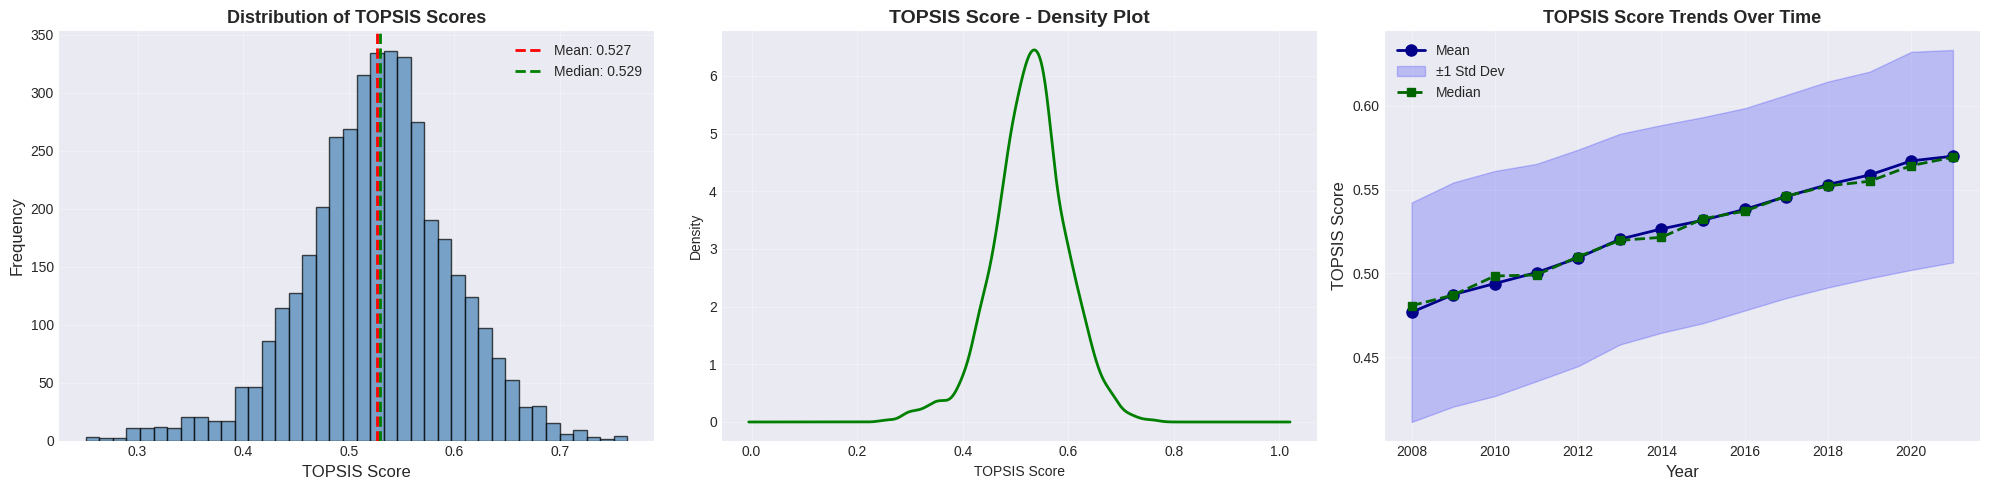

In [11]:
plt.rcParams['figure.figsize'] = (15, 5)
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
axes[0].hist(df['topsis'], bins=40, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axvline(df['topsis'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["topsis"].mean():.3f}')
axes[0].axvline(df['topsis'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["topsis"].median():.3f}')
axes[0].set_xlabel('TOPSIS Score', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of TOPSIS Scores', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
df['topsis'].plot(kind='kde', ax=axes[1], color='green', linewidth=2)
axes[1].set_title('TOPSIS Score - Density Plot', fontsize=14, fontweight='bold')
axes[1].set_xlabel('TOPSIS Score')
axes[1].set_ylabel('Density')
axes[1].grid(True, alpha=0.3)
yearly_stats = df.groupby('year')['topsis'].agg(['mean', 'std', 'median'])
axes[2].plot(yearly_stats.index, yearly_stats['mean'], marker='o', linewidth=2, markersize=8, label='Mean', color='darkblue')
axes[2].fill_between(yearly_stats.index,
                     yearly_stats['mean'] - yearly_stats['std'],
                     yearly_stats['mean'] + yearly_stats['std'],
                     alpha=0.2, color='blue', label='±1 Std Dev')
axes[2].plot(yearly_stats.index, yearly_stats['median'], marker='s', linewidth=2, markersize=6, label='Median', color='darkgreen', linestyle='--')
axes[2].set_xlabel('Year', fontsize=12)
axes[2].set_ylabel('TOPSIS Score', fontsize=12)
axes[2].set_title('TOPSIS Score Trends Over Time', fontsize=13, fontweight='bold')
axes[2].legend()
axes[2].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

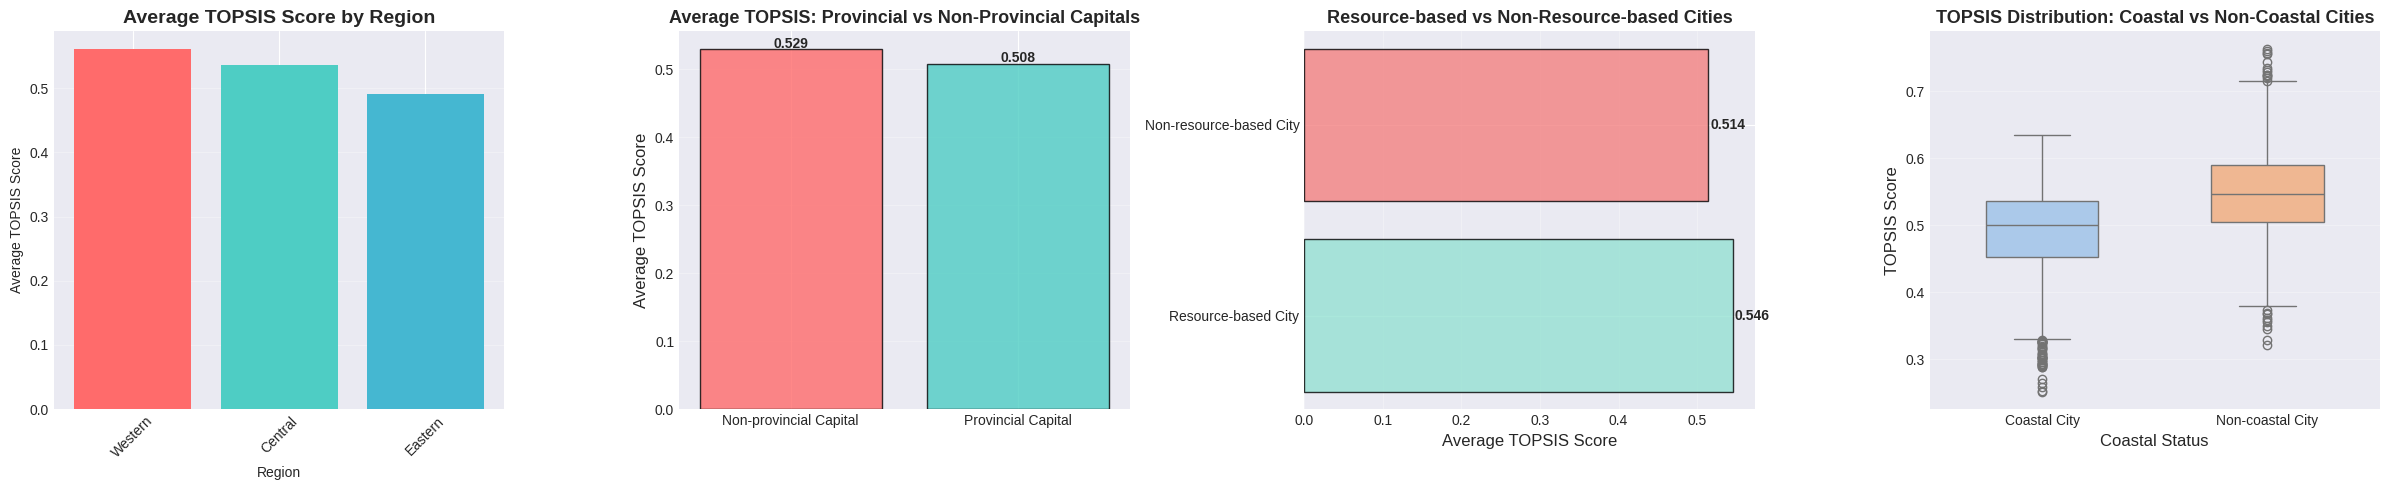

In [12]:
fig, axes = plt.subplots(1, 4, figsize=(24, 5))
region_avg = df.groupby('regin')['topsis'].mean().sort_values(ascending=False)
axes[0].bar(region_avg.index, region_avg.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[0].set_title('Average TOPSIS Score by Region', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Average TOPSIS Score')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3, axis='y')
admin_data = df.groupby('adm')['topsis'].mean().sort_values(ascending=False)
axes[1].bar(admin_data.index, admin_data.values, color=['#FF6B6B', '#4ECDC4'], edgecolor='black', alpha=0.8)
axes[1].set_ylabel('Average TOPSIS Score', fontsize=12)
axes[1].set_title('Average TOPSIS: Provincial vs Non-Provincial Capitals', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(admin_data.values):
    axes[1].text(i, v + 0.002, f'{v:.3f}', ha='center', fontweight='bold')
source_data = df.groupby('source')['topsis'].mean().sort_values(ascending=False)
axes[2].barh(source_data.index, source_data.values, color=['#95E1D3', '#F38181'], edgecolor='black', alpha=0.8)
axes[2].set_xlabel('Average TOPSIS Score', fontsize=12)
axes[2].set_title('Resource-based vs Non-Resource-based Cities', fontsize=13, fontweight='bold')
axes[2].grid(True, alpha=0.3, axis='x')
for i, v in enumerate(source_data.values):
    axes[2].text(v + 0.002, i, f'{v:.3f}', va='center', fontweight='bold')
sns.boxplot(data=df, x='oca', y='topsis', ax=axes[3], palette='pastel', width=0.5)
axes[3].set_xlabel('Coastal Status', fontsize=12)
axes[3].set_ylabel('TOPSIS Score', fontsize=12)
axes[3].set_title('TOPSIS Distribution: Coastal vs Non-Coastal Cities', fontsize=13, fontweight='bold')
axes[3].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

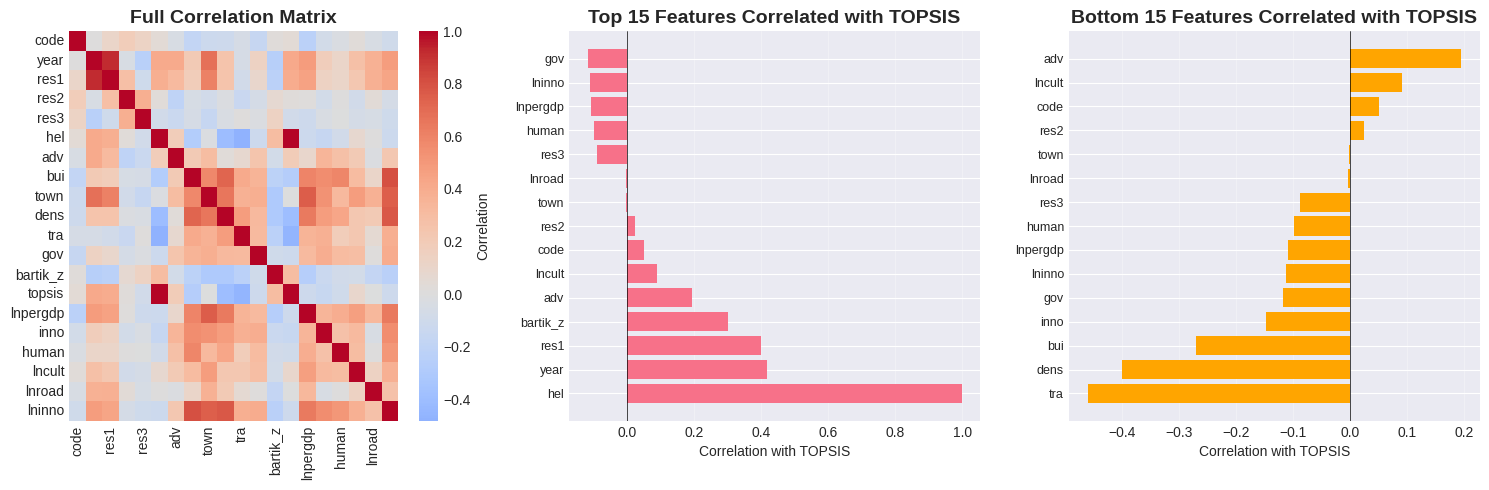

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0,
            ax=axes[0], cbar_kws={'label': 'Correlation'})
axes[0].set_title('Full Correlation Matrix', fontsize=14, fontweight='bold')
topsis_corr = df[numeric_cols].corr()['topsis'].sort_values(ascending=False)[1:16]
axes[1].barh(range(len(topsis_corr)), topsis_corr.values)
axes[1].set_yticks(range(len(topsis_corr)))
axes[1].set_yticklabels(topsis_corr.index, fontsize=9)
axes[1].set_xlabel('Correlation with TOPSIS')
axes[1].set_title('Top 15 Features Correlated with TOPSIS', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='x')
axes[1].axvline(x=0, color='black', linestyle='-', linewidth=0.5)
topsis_corr_bottom = df[numeric_cols].corr()['topsis'].sort_values(ascending=True)[:15]
axes[2].barh(range(len(topsis_corr_bottom)), topsis_corr_bottom.values, color='orange')
axes[2].set_yticks(range(len(topsis_corr_bottom)))
axes[2].set_yticklabels(topsis_corr_bottom.index, fontsize=9)
axes[2].set_xlabel('Correlation with TOPSIS')
axes[2].set_title('Bottom 15 Features Correlated with TOPSIS', fontsize=14, fontweight='bold')
axes[2].grid(True, alpha=0.3, axis='x')
axes[2].axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

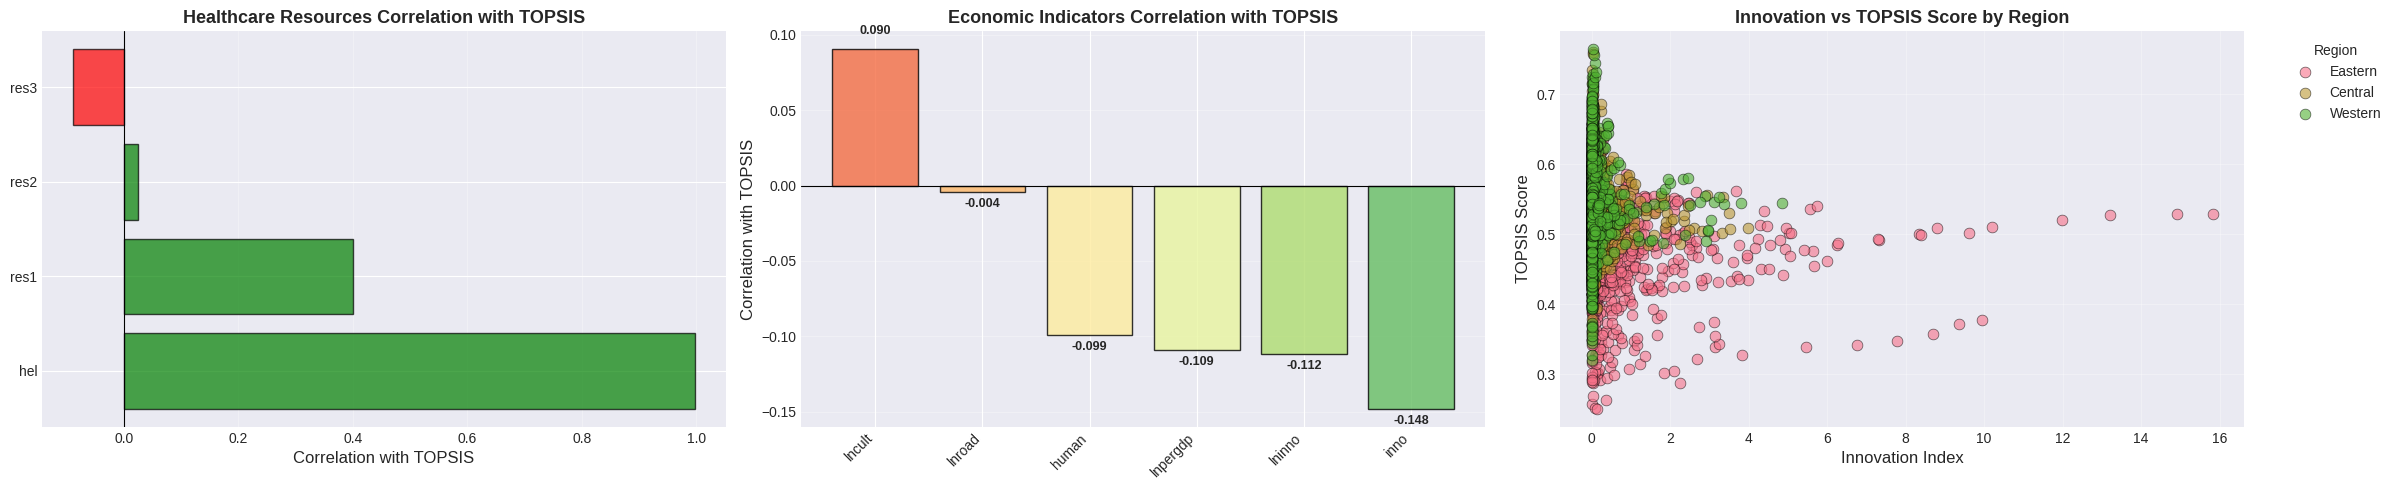

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(24, 5))
health_cols = ['res1', 'res2', 'res3', 'hel']
correlations = df[health_cols + ['topsis']].corr()['topsis'].drop('topsis').sort_values(ascending=False)
colors = ['green' if x > 0 else 'red' for x in correlations.values]
axes[0].barh(correlations.index, correlations.values, color=colors, alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Correlation with TOPSIS', fontsize=12)
axes[0].set_title('Healthcare Resources Correlation with TOPSIS', fontsize=13, fontweight='bold')
axes[0].axvline(x=0, color='black', linestyle='-', linewidth=0.8)
axes[0].grid(True, alpha=0.3, axis='x')
econ_cols = ['lnpergdp', 'inno', 'human', 'lncult', 'lnroad', 'lninno']
econ_corr = df[econ_cols + ['topsis']].corr()['topsis'].drop('topsis').sort_values(ascending=False)
colors_econ = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(econ_corr)))
bars = axes[1].bar(range(len(econ_corr)), econ_corr.values, color=colors_econ, edgecolor='black', alpha=0.8)
axes[1].set_xticks(range(len(econ_corr)))
axes[1].set_xticklabels(econ_corr.index, rotation=45, ha='right')
axes[1].set_ylabel('Correlation with TOPSIS', fontsize=12)
axes[1].set_title('Economic Indicators Correlation with TOPSIS', fontsize=13, fontweight='bold')
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=0.8)
axes[1].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(econ_corr.values):
    axes[1].text(i, v + 0.01 if v > 0 else v - 0.01, f'{v:.3f}', ha='center', fontweight='bold', fontsize=9)
for region in df['regin'].unique():
    region_data = df[df['regin'] == region]
    axes[2].scatter(region_data['inno'], region_data['topsis'], label=region, alpha=0.6, s=60, edgecolors='black', linewidth=0.5)
axes[2].set_xlabel('Innovation Index', fontsize=12)
axes[2].set_ylabel('TOPSIS Score', fontsize=12)
axes[2].set_title('Innovation vs TOPSIS Score by Region', fontsize=13, fontweight='bold')
axes[2].legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[2].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

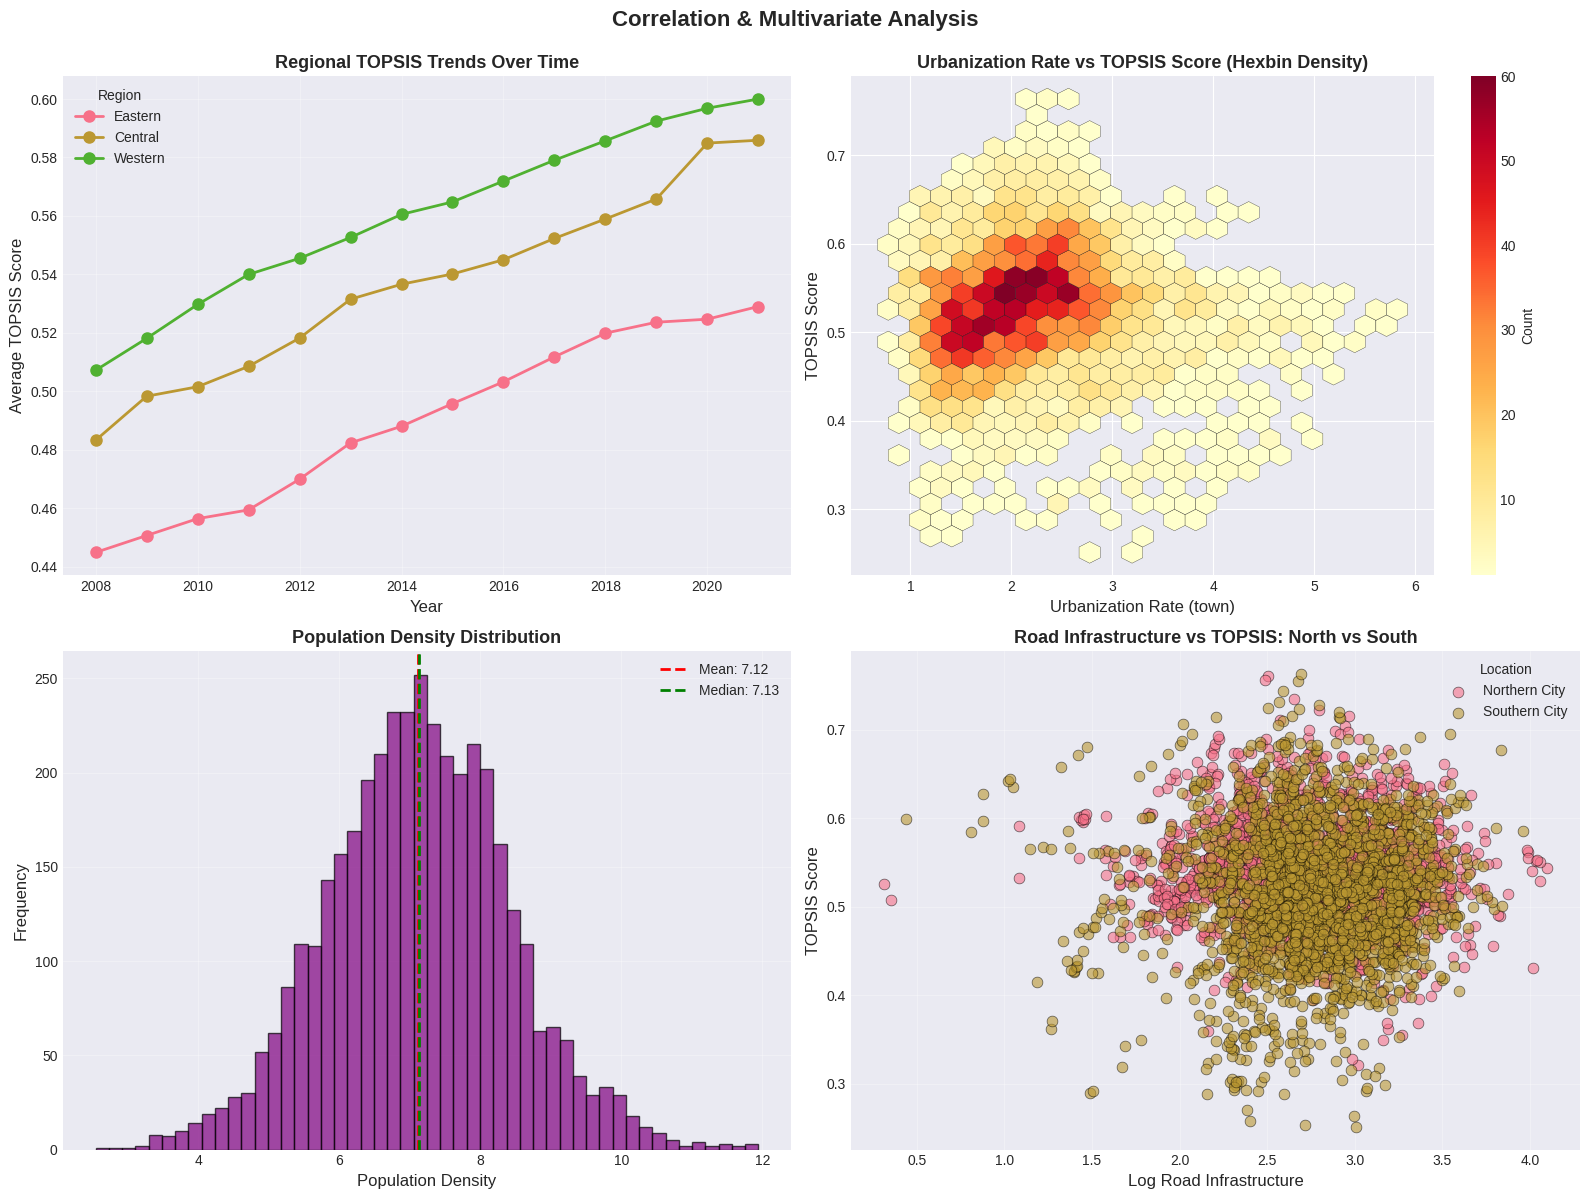

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Correlation & Multivariate Analysis', fontsize=16, fontweight='bold', y=0.995)
yearly_regional = df.groupby(['year', 'regin'])['topsis'].mean().reset_index()
for region in df['regin'].unique():
    region_data = yearly_regional[yearly_regional['regin'] == region]
    axes[0, 0].plot(region_data['year'], region_data['topsis'], marker='o', linewidth=2, markersize=8, label=region)
axes[0, 0].set_xlabel('Year', fontsize=12)
axes[0, 0].set_ylabel('Average TOPSIS Score', fontsize=12)
axes[0, 0].set_title('Regional TOPSIS Trends Over Time', fontsize=13, fontweight='bold')
axes[0, 0].legend(title='Region')
axes[0, 0].grid(True, alpha=0.3)
hexbin = axes[0, 1].hexbin(df['town'], df['topsis'], gridsize=25, cmap='YlOrRd', mincnt=1, edgecolors='black', linewidths=0.2)
axes[0, 1].set_xlabel('Urbanization Rate (town)', fontsize=12)
axes[0, 1].set_ylabel('TOPSIS Score', fontsize=12)
axes[0, 1].set_title('Urbanization Rate vs TOPSIS Score (Hexbin Density)', fontsize=13, fontweight='bold')
plt.colorbar(hexbin, ax=axes[0, 1], label='Count')
axes[1, 0].hist(df['dens'], bins=50, color='purple', edgecolor='black', alpha=0.7)
axes[1, 0].axvline(df['dens'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["dens"].mean():.2f}')
axes[1, 0].axvline(df['dens'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["dens"].median():.2f}')
axes[1, 0].set_xlabel('Population Density', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)
axes[1, 0].set_title('Population Density Distribution', fontsize=13, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
for location in df['sou'].unique():
    loc_data = df[df['sou'] == location]
    axes[1, 1].scatter(loc_data['lnroad'], loc_data['topsis'], label=location, alpha=0.6, s=60, edgecolors='black', linewidth=0.5)
axes[1, 1].set_xlabel('Log Road Infrastructure', fontsize=12)
axes[1, 1].set_ylabel('TOPSIS Score', fontsize=12)
axes[1, 1].set_title('Road Infrastructure vs TOPSIS: North vs South', fontsize=13, fontweight='bold')
axes[1, 1].legend(title='Location')
axes[1, 1].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

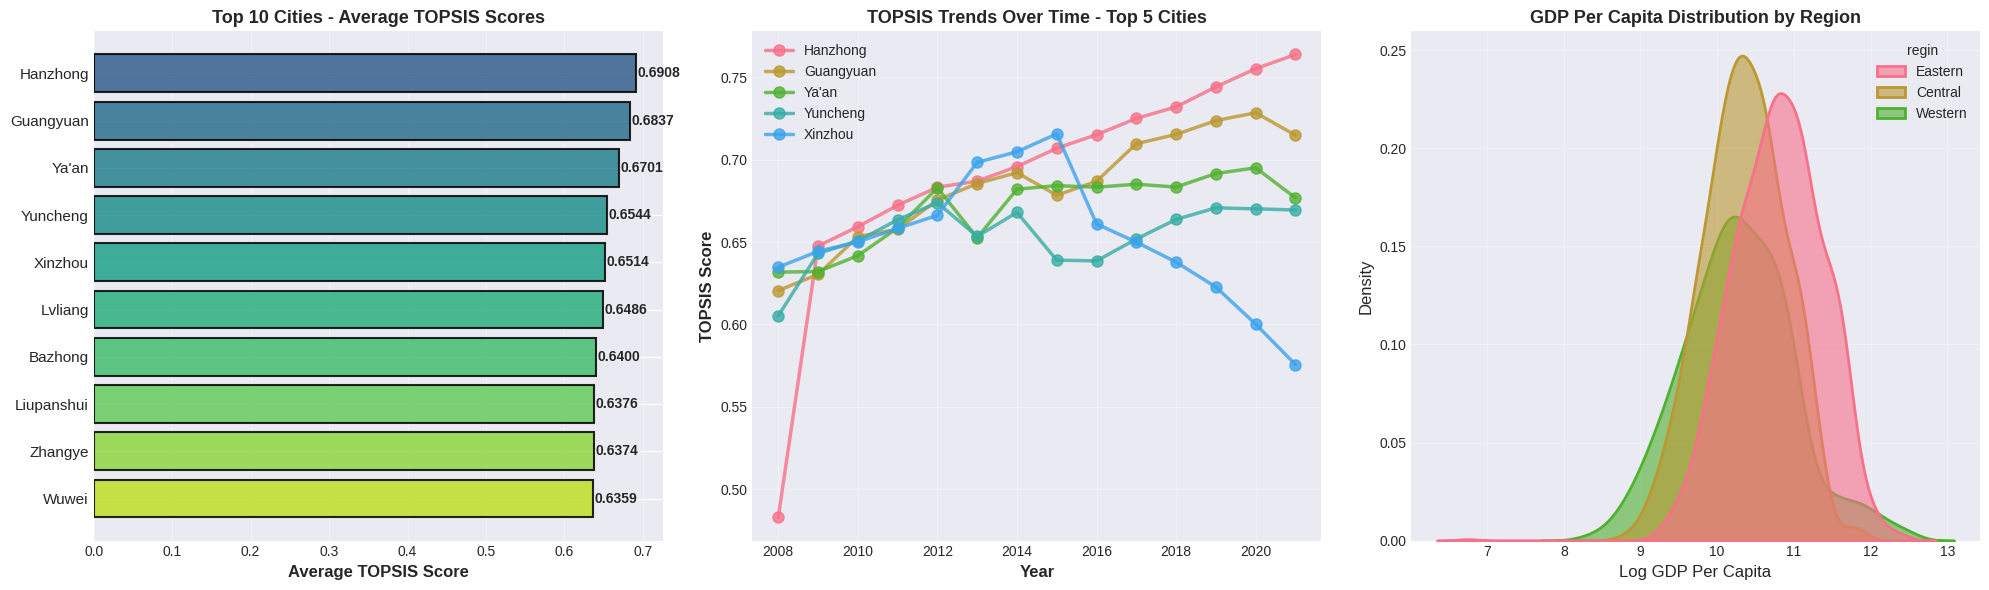

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
top10_cities = df.groupby('city')['topsis'].mean().sort_values(ascending=False).head(10)
top10_data = df[df['city'].isin(top10_cities.index)]
colors_gradient = plt.cm.viridis(np.linspace(0.3, 0.9, 10))
bars1 = axes[0].barh(range(10), top10_cities.values[::-1], color=colors_gradient[::-1],
                     edgecolor='black', linewidth=1.5, alpha=0.85)
axes[0].set_yticks(range(10))
axes[0].set_yticklabels(top10_cities.index[::-1], fontsize=11)
axes[0].set_xlabel('Average TOPSIS Score', fontsize=12, fontweight='bold')
axes[0].set_title('Top 10 Cities - Average TOPSIS Scores', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='x')
for i, (idx, v) in enumerate(zip(range(9, -1, -1), top10_cities.values[::-1])):
    axes[0].text(v + 0.002, i, f'{v:.4f}', va='center', fontweight='bold', fontsize=10)
city_order = top10_cities.index[:5]  # Top 5 cities
for city in city_order:
    city_data = top10_data[top10_data['city'] == city].groupby('year')['topsis'].mean()
    axes[1].plot(city_data.index, city_data.values, marker='o', linewidth=2.5,
                 markersize=8, label=city, alpha=0.8)
axes[1].set_xlabel('Year', fontsize=12, fontweight='bold')
axes[1].set_ylabel('TOPSIS Score', fontsize=12, fontweight='bold')
axes[1].set_title('TOPSIS Trends Over Time - Top 5 Cities', fontsize=13, fontweight='bold')
axes[1].legend(loc='best', fontsize=10)
axes[1].grid(True, alpha=0.3)
sns.kdeplot(data=df, x='lnpergdp', hue='regin', fill=True, ax=axes[2], alpha=0.6, linewidth=2)
axes[2].set_xlabel('Log GDP Per Capita', fontsize=12)
axes[2].set_ylabel('Density', fontsize=12)
axes[2].set_title('GDP Per Capita Distribution by Region', fontsize=13, fontweight='bold')
axes[2].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Data Preprocessing

In [17]:
df_processed = df.copy()

In [18]:
# Handle Categorical Variables
categorical_cols = ['city', 'regin', 'source', 'adm', 'oca', 'sou']
label_encoders = {}
for col in categorical_cols:
    if col in df_processed.columns:
        le = LabelEncoder()
        df_processed[col] = le.fit_transform(df_processed[col].astype(str))
        label_encoders[col] = le
        print(f" Encoded: {col}")

 Encoded: city
 Encoded: regin
 Encoded: source
 Encoded: adm
 Encoded: oca
 Encoded: sou


In [19]:
# Handle Missing Values
missing_before = df_processed.isnull().sum().sum()
print(f"  Total missing values before: {missing_before}")
# Impute numeric columns with median
numeric_cols = df_processed.select_dtypes(include=[np.number]).columns.tolist()
if missing_before > 0:
    imputer = SimpleImputer(strategy='median')
    df_processed[numeric_cols] = imputer.fit_transform(df_processed[numeric_cols])
missing_after = df_processed.isnull().sum().sum()
print(f"  Total missing values after: {missing_after}")

  Total missing values before: 287
  Total missing values after: 0


In [20]:
# Separate Features and Target
X = df_processed.drop(['topsis'], axis=1)
y = df_processed['topsis']
print(f"  Features shape: {X.shape}")
print(f"  Target shape: {y.shape}")

  Features shape: (3976, 25)
  Target shape: (3976,)


In [21]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"  Training set size: {X_train.shape[0]} samples")
print(f"  Test set size: {X_test.shape[0]} samples")

  Training set size: 3180 samples
  Test set size: 796 samples


In [22]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Machine Learning Models - Implementation & Evaluation
##**MODEL 1: LINEAR REGRESSION**

In [23]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [24]:
# Make predictions
y_train_pred_lr = lr_model.predict(X_train_scaled)
y_test_pred_lr = lr_model.predict(X_test_scaled)

In [25]:
# Calculate metrics
lr_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))
lr_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))
lr_train_mae = mean_absolute_error(y_train, y_train_pred_lr)
lr_test_mae = mean_absolute_error(y_test, y_test_pred_lr)
lr_train_r2 = r2_score(y_train, y_train_pred_lr)
lr_test_r2 = r2_score(y_test, y_test_pred_lr)

In [26]:
# Display results
print(f"  Training RMSE: {lr_train_rmse:.4f}")
print(f"  Test RMSE: {lr_test_rmse:.4f}")
print(f"  Training MAE: {lr_train_mae:.4f}")
print(f"  Test MAE: {lr_test_mae:.4f}")
print(f"  Training R²: {lr_train_r2:.4f}")
print(f"  Test R²: {lr_test_r2:.4f}")

  Training RMSE: 0.0043
  Test RMSE: 0.0040
  Training MAE: 0.0027
  Test MAE: 0.0027
  Training R²: 0.9962
  Test R²: 0.9966


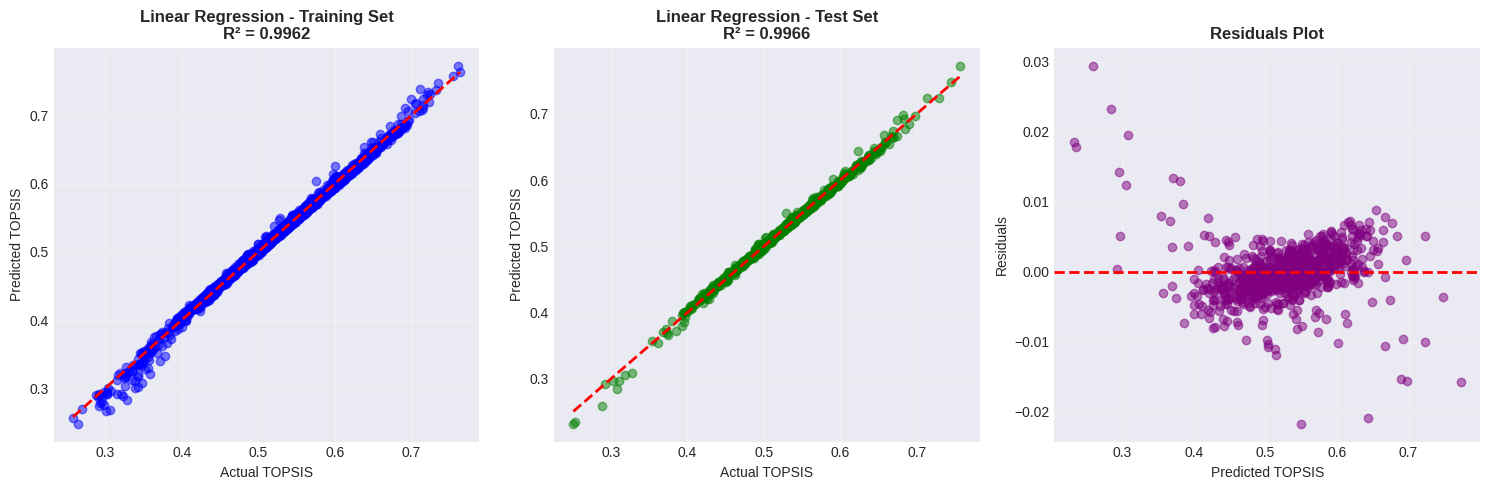

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].scatter(y_train, y_train_pred_lr, alpha=0.5, color='blue')
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual TOPSIS')
axes[0].set_ylabel('Predicted TOPSIS')
axes[0].set_title(f'Linear Regression - Training Set\nR² = {lr_train_r2:.4f}', fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[1].scatter(y_test, y_test_pred_lr, alpha=0.5, color='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual TOPSIS')
axes[1].set_ylabel('Predicted TOPSIS')
axes[1].set_title(f'Linear Regression - Test Set\nR² = {lr_test_r2:.4f}', fontweight='bold')
axes[1].grid(True, alpha=0.3)
residuals = y_test - y_test_pred_lr
axes[2].scatter(y_test_pred_lr, residuals, alpha=0.5, color='purple')
axes[2].axhline(y=0, color='r', linestyle='--', lw=2)
axes[2].set_xlabel('Predicted TOPSIS')
axes[2].set_ylabel('Residuals')
axes[2].set_title('Residuals Plot', fontweight='bold')
axes[2].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## **Model 2: Ridge Regression**

In [28]:
# Train the model
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train_scaled, y_train)

Ridge(random_state=42)

In [29]:
# Make predictions
y_train_pred_ridge = ridge_model.predict(X_train_scaled)
y_test_pred_ridge = ridge_model.predict(X_test_scaled)

In [30]:
# Calculate metrics
ridge_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge))
ridge_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))
ridge_train_mae = mean_absolute_error(y_train, y_train_pred_ridge)
ridge_test_mae = mean_absolute_error(y_test, y_test_pred_ridge)
ridge_train_r2 = r2_score(y_train, y_train_pred_ridge)
ridge_test_r2 = r2_score(y_test, y_test_pred_ridge)

In [31]:
print(f"  Training RMSE: {ridge_train_rmse:.4f}")
print(f"  Test RMSE: {ridge_test_rmse:.4f}")
print(f"  Training MAE: {ridge_train_mae:.4f}")
print(f"  Test MAE: {ridge_test_mae:.4f}")
print(f"  Training R²: {ridge_train_r2:.4f}")
print(f"  Test R²: {ridge_test_r2:.4f}")

  Training RMSE: 0.0043
  Test RMSE: 0.0040
  Training MAE: 0.0027
  Test MAE: 0.0027
  Training R²: 0.9962
  Test R²: 0.9966


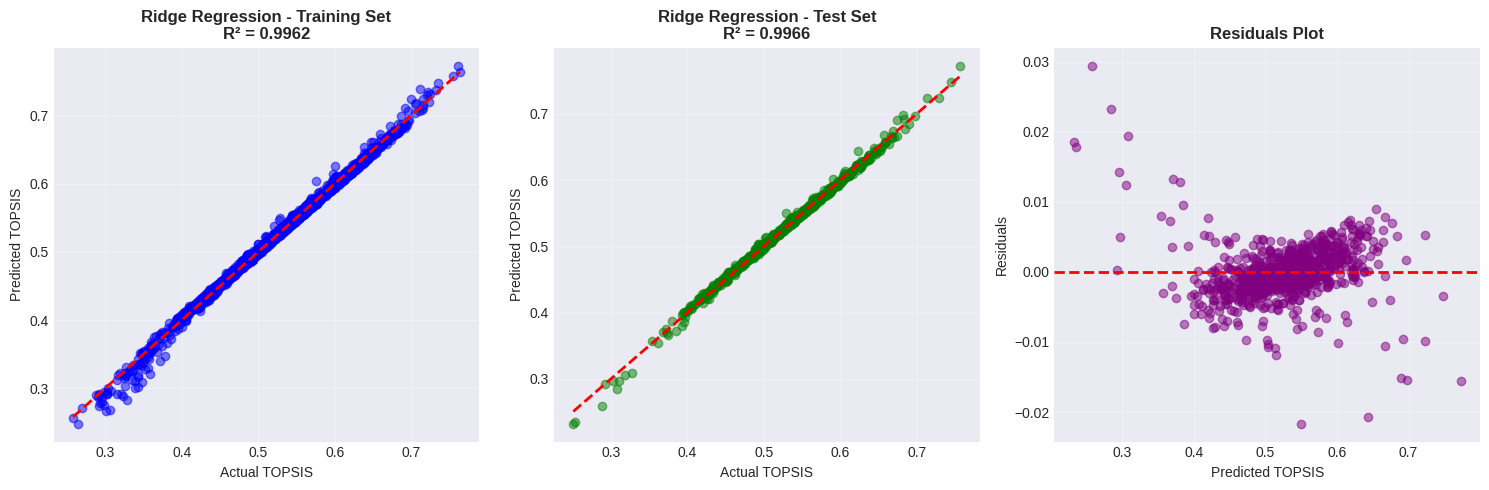

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].scatter(y_train, y_train_pred_ridge, alpha=0.5, color='blue')
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual TOPSIS')
axes[0].set_ylabel('Predicted TOPSIS')
axes[0].set_title(f'Ridge Regression - Training Set\nR² = {ridge_train_r2:.4f}', fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[1].scatter(y_test, y_test_pred_ridge, alpha=0.5, color='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual TOPSIS')
axes[1].set_ylabel('Predicted TOPSIS')
axes[1].set_title(f'Ridge Regression - Test Set\nR² = {ridge_test_r2:.4f}', fontweight='bold')
axes[1].grid(True, alpha=0.3)
residuals_ridge = y_test - y_test_pred_ridge
axes[2].scatter(y_test_pred_ridge, residuals_ridge, alpha=0.5, color='purple')
axes[2].axhline(y=0, color='r', linestyle='--', lw=2)
axes[2].set_xlabel('Predicted TOPSIS')
axes[2].set_ylabel('Residuals')
axes[2].set_title('Residuals Plot', fontweight='bold')
axes[2].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## **Model 3: Decision Tree Regressor**

In [33]:
dt_model = DecisionTreeRegressor(max_depth=10, min_samples_split=10, random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=10, random_state=42)

In [34]:
# Make predictions
y_train_pred_dt = dt_model.predict(X_train)
y_test_pred_dt = dt_model.predict(X_test)

In [35]:
# Calculate metrics
dt_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_dt))
dt_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_dt))
dt_train_mae = mean_absolute_error(y_train, y_train_pred_dt)
dt_test_mae = mean_absolute_error(y_test, y_test_pred_dt)
dt_train_r2 = r2_score(y_train, y_train_pred_dt)
dt_test_r2 = r2_score(y_test, y_test_pred_dt)

In [36]:
print(f"  Training RMSE: {dt_train_rmse:.4f}")
print(f"  Test RMSE: {dt_test_rmse:.4f}")
print(f"  Training MAE: {dt_train_mae:.4f}")
print(f"  Test MAE: {dt_test_mae:.4f}")
print(f"  Training R²: {dt_train_r2:.4f}")
print(f"  Test R²: {dt_test_r2:.4f}")

  Training RMSE: 0.0014
  Test RMSE: 0.0033
  Training MAE: 0.0007
  Test MAE: 0.0015
  Training R²: 0.9996
  Test R²: 0.9977


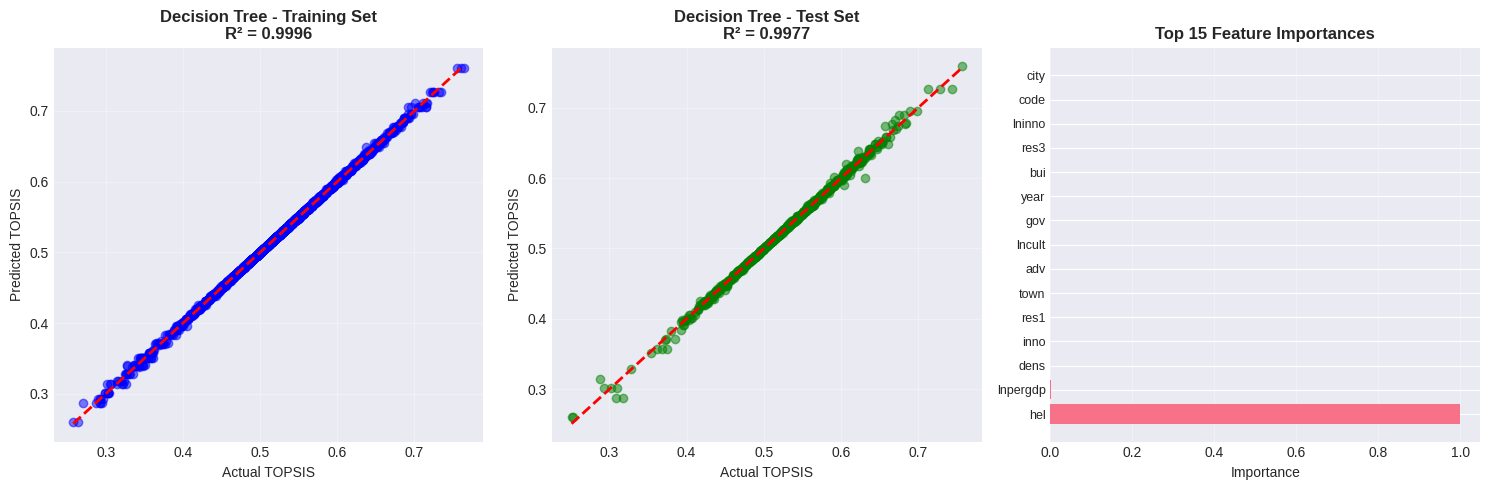

In [37]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].scatter(y_train, y_train_pred_dt, alpha=0.5, color='blue')
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual TOPSIS')
axes[0].set_ylabel('Predicted TOPSIS')
axes[0].set_title(f'Decision Tree - Training Set\nR² = {dt_train_r2:.4f}', fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[1].scatter(y_test, y_test_pred_dt, alpha=0.5, color='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual TOPSIS')
axes[1].set_ylabel('Predicted TOPSIS')
axes[1].set_title(f'Decision Tree - Test Set\nR² = {dt_test_r2:.4f}', fontweight='bold')
axes[1].grid(True, alpha=0.3)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_model.feature_importances_
}).sort_values('importance', ascending=False).head(15)
axes[2].barh(range(len(feature_importance)), feature_importance['importance'].values)
axes[2].set_yticks(range(len(feature_importance)))
axes[2].set_yticklabels(feature_importance['feature'].values, fontsize=9)
axes[2].set_xlabel('Importance')
axes[2].set_title('Top 15 Feature Importances', fontweight='bold')
axes[2].grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

## **Model 4: Random Forest Regressor**

In [38]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=15,
                                  min_samples_split=5, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, min_samples_split=5, n_jobs=-1,
                      random_state=42)

In [39]:
# Make predictions
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

In [40]:
# Calculate metrics
rf_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
rf_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
rf_train_mae = mean_absolute_error(y_train, y_train_pred_rf)
rf_test_mae = mean_absolute_error(y_test, y_test_pred_rf)
rf_train_r2 = r2_score(y_train, y_train_pred_rf)
rf_test_r2 = r2_score(y_test, y_test_pred_rf)

In [41]:
print(f"  Training RMSE: {rf_train_rmse:.4f}")
print(f"  Test RMSE: {rf_test_rmse:.4f}")
print(f"  Training MAE: {rf_train_mae:.4f}")
print(f"  Test MAE: {rf_test_mae:.4f}")
print(f"  Training R²: {rf_train_r2:.4f}")
print(f"  Test R²: {rf_test_r2:.4f}")

  Training RMSE: 0.0011
  Test RMSE: 0.0026
  Training MAE: 0.0005
  Test MAE: 0.0012
  Training R²: 0.9997
  Test R²: 0.9985


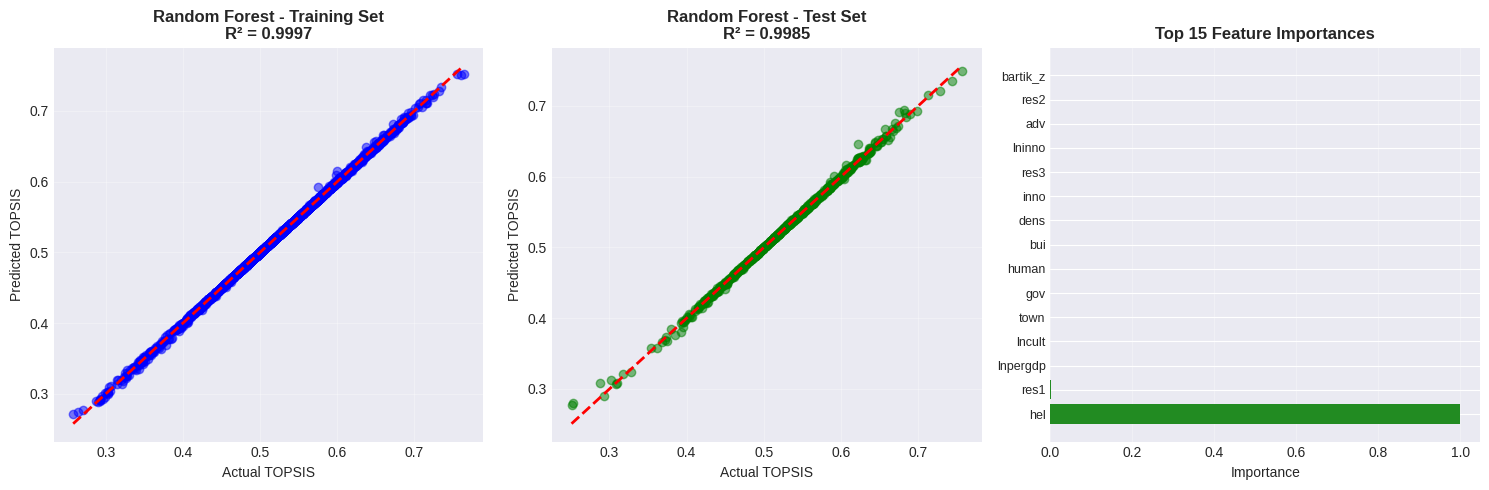

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].scatter(y_train, y_train_pred_rf, alpha=0.5, color='blue')
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual TOPSIS')
axes[0].set_ylabel('Predicted TOPSIS')
axes[0].set_title(f'Random Forest - Training Set\nR² = {rf_train_r2:.4f}', fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[1].scatter(y_test, y_test_pred_rf, alpha=0.5, color='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual TOPSIS')
axes[1].set_ylabel('Predicted TOPSIS')
axes[1].set_title(f'Random Forest - Test Set\nR² = {rf_test_r2:.4f}', fontweight='bold')
axes[1].grid(True, alpha=0.3)
feature_importance_rf = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False).head(15)

axes[2].barh(range(len(feature_importance_rf)), feature_importance_rf['importance'].values, color='forestgreen')
axes[2].set_yticks(range(len(feature_importance_rf)))
axes[2].set_yticklabels(feature_importance_rf['feature'].values, fontsize=9)
axes[2].set_xlabel('Importance')
axes[2].set_title('Top 15 Feature Importances', fontweight='bold')
axes[2].grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

## **Model 5: Gradient Boosting Regressor**

In [43]:
gb_model = GradientBoostingRegressor(n_estimators=100, max_depth=5,
                                      learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, random_state=42)

In [44]:
# Make predictions
y_train_pred_gb = gb_model.predict(X_train)
y_test_pred_gb = gb_model.predict(X_test)

In [45]:
# Calculate metrics
gb_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_gb))
gb_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_gb))
gb_train_mae = mean_absolute_error(y_train, y_train_pred_gb)
gb_test_mae = mean_absolute_error(y_test, y_test_pred_gb)
gb_train_r2 = r2_score(y_train, y_train_pred_gb)
gb_test_r2 = r2_score(y_test, y_test_pred_gb)

In [46]:
print(f"  Training RMSE: {gb_train_rmse:.4f}")
print(f"  Test RMSE: {gb_test_rmse:.4f}")
print(f"  Training MAE: {gb_train_mae:.4f}")
print(f"  Test MAE: {gb_test_mae:.4f}")
print(f"  Training R²: {gb_train_r2:.4f}")
print(f"  Test R²: {gb_test_r2:.4f}")

  Training RMSE: 0.0006
  Test RMSE: 0.0019
  Training MAE: 0.0004
  Test MAE: 0.0009
  Training R²: 0.9999
  Test R²: 0.9992


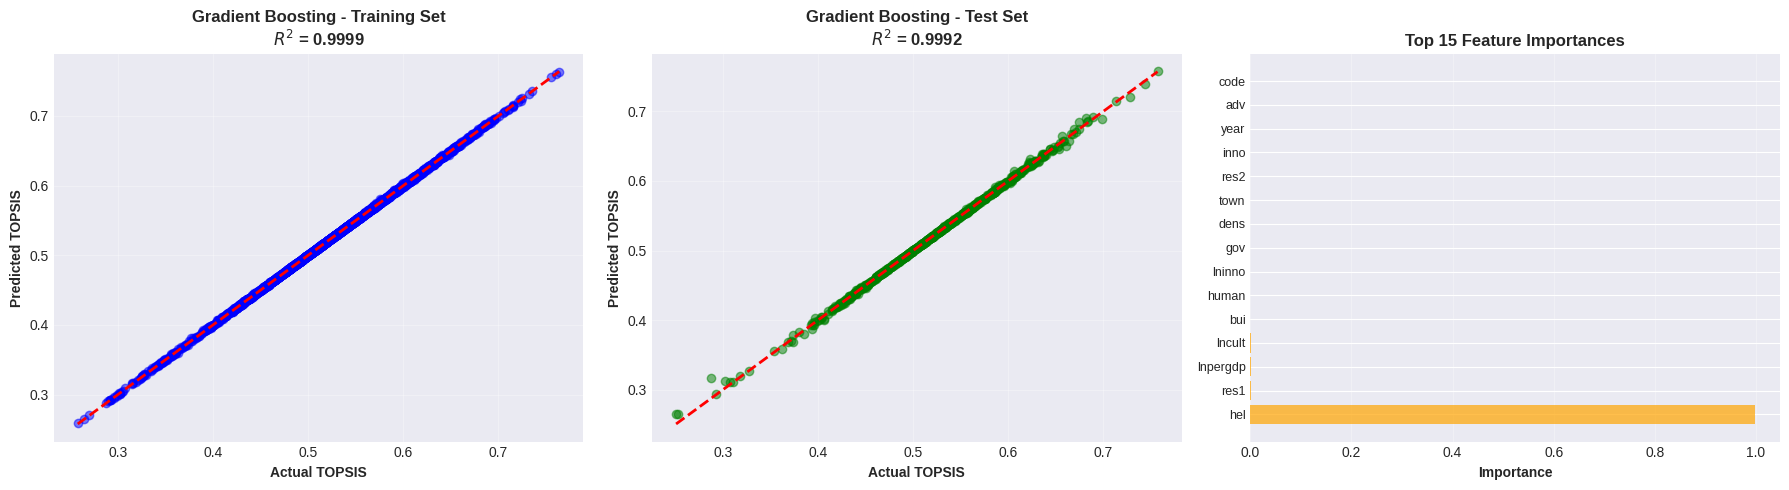

In [47]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes[0].scatter(y_train, y_train_pred_gb, alpha=0.5, color='blue')
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual TOPSIS', fontweight='bold')
axes[0].set_ylabel('Predicted TOPSIS', fontweight='bold')
axes[0].set_title(f'Gradient Boosting - Training Set\n$R^2$ = {gb_train_r2:.4f}', fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[1].scatter(y_test, y_test_pred_gb, alpha=0.5, color='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual TOPSIS', fontweight='bold')
axes[1].set_ylabel('Predicted TOPSIS', fontweight='bold')
axes[1].set_title(f'Gradient Boosting - Test Set\n$R^2$ = {gb_test_r2:.4f}', fontweight='bold')
axes[1].grid(True, alpha=0.3)
feature_importance_gb = pd.DataFrame({
    'feature': X.columns,
    'importance': gb_model.feature_importances_
}).sort_values('importance', ascending=False).head(15)
axes[2].barh(range(len(feature_importance_gb)), feature_importance_gb['importance'], color='orange', alpha=0.7)
axes[2].set_yticks(range(len(feature_importance_gb)))
axes[2].set_yticklabels(feature_importance_gb['feature'], fontsize=9)
axes[2].set_xlabel('Importance', fontweight='bold')
axes[2].set_title('Top 15 Feature Importances', fontweight='bold')
axes[2].grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

# Model Comparison

In [48]:
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Decision Tree',
              'Random Forest', 'Gradient Boosting'],
    'Train_RMSE': [lr_train_rmse, ridge_train_rmse, dt_train_rmse,
                   rf_train_rmse, gb_train_rmse],
    'Test_RMSE': [lr_test_rmse, ridge_test_rmse, dt_test_rmse,
                  rf_test_rmse, gb_test_rmse],
    'Train_MAE': [lr_train_mae, ridge_train_mae, dt_train_mae,
                  rf_train_mae, gb_train_mae],
    'Test_MAE': [lr_test_mae, ridge_test_mae, dt_test_mae,
                 rf_test_mae, gb_test_mae],
    'Train_R2': [lr_train_r2, ridge_train_r2, dt_train_r2,
                 rf_train_r2, gb_train_r2],
    'Test_R2': [lr_test_r2, ridge_test_r2, dt_test_r2,
                rf_test_r2, gb_test_r2]
})
print(comparison_df.to_string(index=False))

            Model  Train_RMSE  Test_RMSE  Train_MAE  Test_MAE  Train_R2  Test_R2
Linear Regression    0.004311   0.003961   0.002671  0.002653  0.996230 0.996604
 Ridge Regression    0.004311   0.003962   0.002678  0.002660  0.996230 0.996603
    Decision Tree    0.001370   0.003277   0.000672  0.001504  0.999619 0.997676
    Random Forest    0.001146   0.002613   0.000509  0.001157  0.999733 0.998522
Gradient Boosting    0.000640   0.001945   0.000435  0.000908  0.999917 0.999181


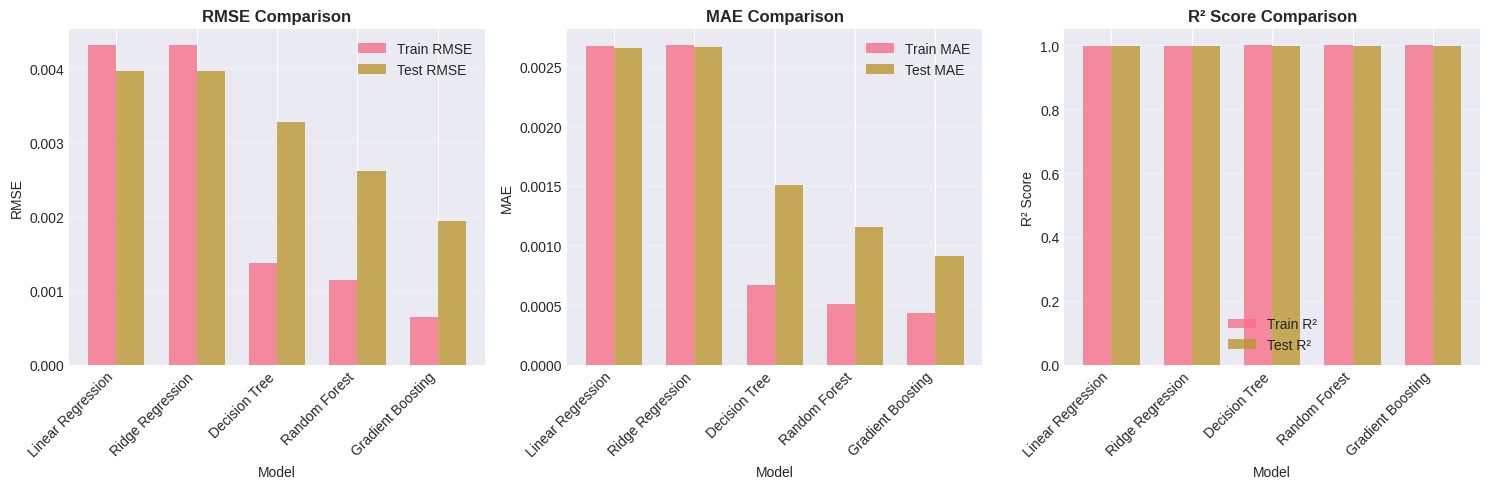

In [49]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
x_pos = np.arange(len(comparison_df))
width = 0.35
axes[0].bar(x_pos - width/2, comparison_df['Train_RMSE'], width, label='Train RMSE', alpha=0.8)
axes[0].bar(x_pos + width/2, comparison_df['Test_RMSE'], width, label='Test RMSE', alpha=0.8)
axes[0].set_xlabel('Model')
axes[0].set_ylabel('RMSE')
axes[0].set_title('RMSE Comparison', fontweight='bold')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')
axes[1].bar(x_pos - width/2, comparison_df['Train_MAE'], width, label='Train MAE', alpha=0.8)
axes[1].bar(x_pos + width/2, comparison_df['Test_MAE'], width, label='Test MAE', alpha=0.8)
axes[1].set_xlabel('Model')
axes[1].set_ylabel('MAE')
axes[1].set_title('MAE Comparison', fontweight='bold')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')
axes[2].bar(x_pos - width/2, comparison_df['Train_R2'], width, label='Train R²', alpha=0.8)
axes[2].bar(x_pos + width/2, comparison_df['Test_R2'], width, label='Test R²', alpha=0.8)
axes[2].set_xlabel('Model')
axes[2].set_ylabel('R² Score')
axes[2].set_title('R² Score Comparison', fontweight='bold')
axes[2].set_xticks(x_pos)
axes[2].set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
axes[2].legend()
axes[2].grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

In [50]:
best_model_idx = comparison_df['Test_R2'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']
best_r2 = comparison_df.loc[best_model_idx, 'Test_R2']
print(f"\n BEST MODEL: {best_model_name} (Test R² = {best_r2:.4f})")


 BEST MODEL: Gradient Boosting (Test R² = 0.9992)


# Testing Methodologies

## Method 1: K-Fold Cross-Validation

In [51]:
models_cv = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0, random_state=42),
    'Decision Tree': DecisionTreeRegressor(max_depth=10, min_samples_split=10, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42)
}
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = {}
print("\n 5-FOLD CROSS-VALIDATION RESULTS:")
print("-" * 60)
for name, model in models_cv.items():
    # Use scaled data for linear models
    if name in ['Linear Regression', 'Ridge Regression']:
        X_cv = X_train_scaled
    else:
        X_cv = X_train
    cv_scores = cross_val_score(model, X_cv, y_train, cv=kfold,
                                 scoring='r2', n_jobs=-1)

    cv_results[name] = {
        'scores': cv_scores,
        'mean': cv_scores.mean(),
        'std': cv_scores.std()
    }
    print(f"\n{name}:")
    print(f"  Fold Scores: {[f'{score:.4f}' for score in cv_scores]}")
    print(f"  Mean R²: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")


 5-FOLD CROSS-VALIDATION RESULTS:
------------------------------------------------------------

Linear Regression:
  Fold Scores: ['0.9953', '0.9962', '0.9970', '0.9952', '0.9962']
  Mean R²: 0.9960 (+/- 0.0006)

Ridge Regression:
  Fold Scores: ['0.9953', '0.9962', '0.9969', '0.9953', '0.9962']
  Mean R²: 0.9960 (+/- 0.0006)

Decision Tree:
  Fold Scores: ['0.9976', '0.9980', '0.9972', '0.9973', '0.9963']
  Mean R²: 0.9973 (+/- 0.0006)

Random Forest:
  Fold Scores: ['0.9989', '0.9988', '0.9979', '0.9984', '0.9984']
  Mean R²: 0.9985 (+/- 0.0003)

Gradient Boosting:
  Fold Scores: ['0.9992', '0.9993', '0.9987', '0.9988', '0.9991']
  Mean R²: 0.9990 (+/- 0.0003)


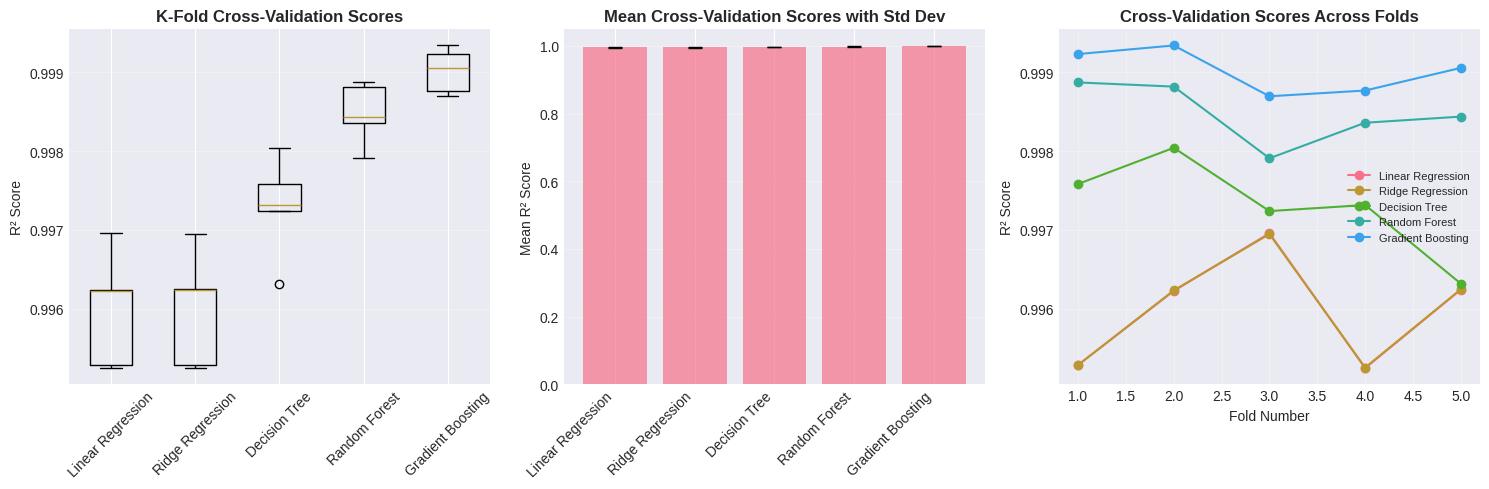

In [52]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
cv_scores_list = [cv_results[name]['scores'] for name in models_cv.keys()]
axes[0].boxplot(cv_scores_list, labels=models_cv.keys())
axes[0].set_ylabel('R² Score')
axes[0].set_title('K-Fold Cross-Validation Scores', fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3, axis='y')
model_names = list(models_cv.keys())
mean_scores = [cv_results[name]['mean'] for name in model_names]
std_scores = [cv_results[name]['std'] for name in model_names]
x_pos = np.arange(len(model_names))
axes[1].bar(x_pos, mean_scores, yerr=std_scores, capsize=5, alpha=0.7)
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(model_names, rotation=45, ha='right')
axes[1].set_ylabel('Mean R² Score')
axes[1].set_title('Mean Cross-Validation Scores with Std Dev', fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')
for name in model_names:
    axes[2].plot(range(1, 6), cv_results[name]['scores'], marker='o', label=name)
axes[2].set_xlabel('Fold Number')
axes[2].set_ylabel('R² Score')
axes[2].set_title('Cross-Validation Scores Across Folds', fontweight='bold')
axes[2].legend(fontsize=8)
axes[2].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## TESTING METHOD 2: LEARNING CURVES

In [53]:
from sklearn.model_selection import learning_curve
selected_models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42),
    'Decision Tree': DecisionTreeRegressor(max_depth=10, min_samples_split=10, random_state=42)
}


Generating learning curve for Random Forest...
  Training samples: 2544
  Final training score: 0.9998 (+/- 0.0000)
  Final validation score: 0.9985 (+/- 0.0003)
   Good generalization (gap: 0.0013)

Generating learning curve for Gradient Boosting...
  Training samples: 2544
  Final training score: 0.9999 (+/- 0.0000)
  Final validation score: 0.9990 (+/- 0.0003)
   Good generalization (gap: 0.0009)

Generating learning curve for Decision Tree...
  Training samples: 2544
  Final training score: 0.9995 (+/- 0.0001)
  Final validation score: 0.9973 (+/- 0.0004)
   Good generalization (gap: 0.0022)


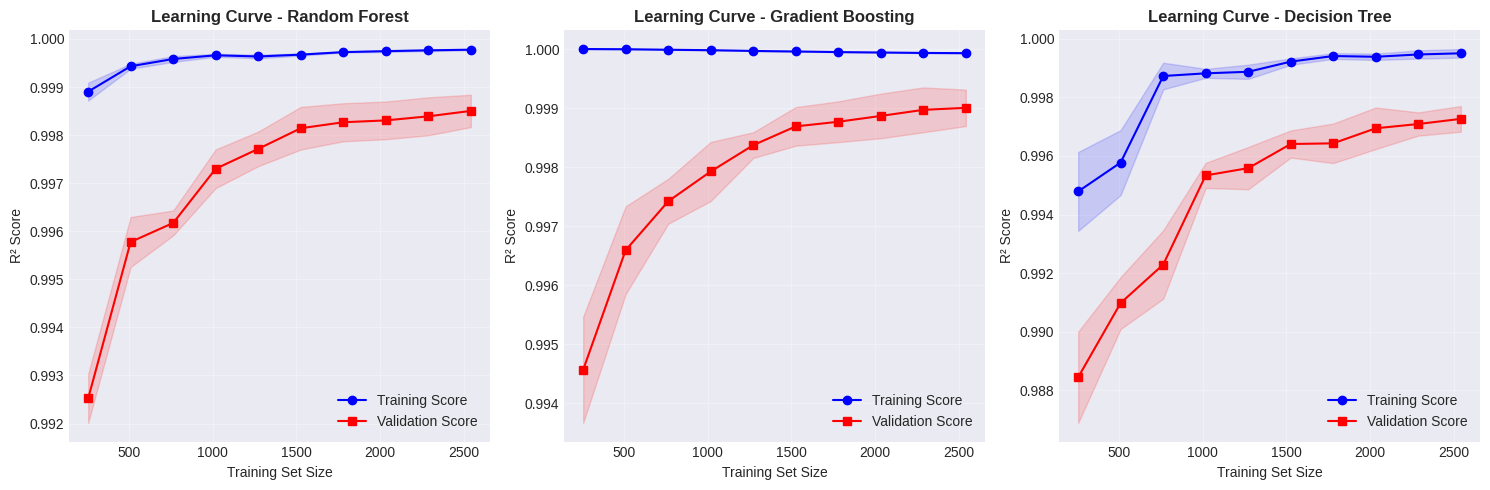

In [54]:
# Create learning curves
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, (name, model) in enumerate(selected_models.items()):
    print(f"\nGenerating learning curve for {name}...")
    # Calculate learning curve
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5,
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='r2', n_jobs=-1
    )
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    axes[idx].plot(train_sizes, train_mean, label='Training Score', marker='o', color='blue')
    axes[idx].fill_between(train_sizes, train_mean - train_std, train_mean + train_std,
                            alpha=0.15, color='blue')
    axes[idx].plot(train_sizes, test_mean, label='Validation Score', marker='s', color='red')
    axes[idx].fill_between(train_sizes, test_mean - test_std, test_mean + test_std,
                            alpha=0.15, color='red')
    axes[idx].set_xlabel('Training Set Size')
    axes[idx].set_ylabel('R² Score')
    axes[idx].set_title(f'Learning Curve - {name}', fontweight='bold')
    axes[idx].legend(loc='lower right')
    axes[idx].grid(True, alpha=0.3)
    print(f"  Training samples: {train_sizes[-1]}")
    print(f"  Final training score: {train_mean[-1]:.4f} (+/- {train_std[-1]:.4f})")
    print(f"  Final validation score: {test_mean[-1]:.4f} (+/- {test_std[-1]:.4f})")
    # Diagnose overfitting/underfitting
    gap = train_mean[-1] - test_mean[-1]
    if gap > 0.1:
        print(f"   Potential overfitting detected (gap: {gap:.4f})")
    elif test_mean[-1] < 0.6:
        print(f"   Potential underfitting detected (low validation score)")
    else:
        print(f"   Good generalization (gap: {gap:.4f})")
plt.tight_layout()
plt.show()